# $11^{th}$ excercises - 11.1: Linear regression
## Notebook setup
#### Used libraries

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Functions

In [14]:
def TestParameters():
    deltaepochss=np.ones(len(epochss))*epochss[0]
    for i in range(len(epochss)-1):
        deltaepochss[i+1]=epochss[i+1]-epochss[i] 
    print("Epochs delta: ",deltaepochss)
        
    # open and clear output files
    fout_m = open("out/111-m_diff.csv","a")
    fout_b = open("out/111-b_diff.csv","a")
    fout_m.truncate(0)
    fout_b.truncate(0)

    for ntrain in ntrains:
        nvalid = ntrain // 10
        np.random.seed(0)
        tf.random.set_seed(0)
        #creating training and validation datasets
        x_train = np.random.uniform(-1, 1, ntrain)
        x_valid = np.random.uniform(-1, 1, nvalid)
        x_valid.sort()
        

        for sigma in sigmas:
            np.random.seed(0)
            tf.random.set_seed(0)
            y_train = np.random.normal(m * x_train + b, sigma) 
            y_valid = np.random.normal(m * x_valid + b, sigma) 
            #creating and compiling the model
            model = tf.keras.Sequential()
            model.add(Dense(1, input_shape=(1,)))
            model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
            
            df=pd.DataFrame()
            
            for epochs in epochss:
                #optimizing the model
                ## model.fit(epochs=20)=four calls of
                ## model.fit(epochs=5)
                history = model.fit(x=x_train, y=y_train, 
                                    batch_size=32, 
                                    epochs=epochs,
                                    shuffle=True, 
                                    validation_data=(x_valid, y_valid))        
                df=pd.concat([df,pd.DataFrame(history.history)])
                
                # output
                mb = model.get_weights()

                printm=str(mb[0])[2:-2]
                printb=str(mb[1])[1:-1] #don't want brackets in final string
                fout_m.write(printm+"\n")
                fout_b.write(printb+"\n")
                
                path_model="out/111-model-ntrain="+str(ntrain)+"-sigma="+str(sigma)+"-epochs="+str(epochs)+".tf"
                model.save(filepath=path_model, include_optimizer=True) 
            
            path_history="out/111-history-ntrain="+str(ntrain)+"-sigma="+str(sigma)+".csv"
            with open(path_history, mode='w') as file:
                df.to_csv(file)
            print()
             

In [4]:
def show_results(model, history, npredict, epochs):
    plt.figure(figsize=(16,8))
    
    plt.subplot(121)
    plt.plot(history["loss"].iloc[:epochs], label="Training")
    plt.plot(history["val_loss"].iloc[:epochs], label="Validation")
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend()
    plt.grid(True)

    plt.subplot(122)
    x_predict = np.random.uniform(-1, 1, npredict)
    y_predict = model.predict(x_predict)
    x_target=np.sort(x_predict)
    y_target = m * x_target + b 
    plt.scatter(x_predict, y_predict, label='Predicted')
    plt.plot(x_target, y_target, label='Target')   
    plt.grid(True)
    plt.legend()

    
    plt.show()

## The excercise

Neural networks (NN) are a technique to perform supervised learning, that is building an algorithm able to learn from labelled data how to label never-seen-before data. Assigning labels to data is exactly what a function in a mathematical sense does, hence NN can be used to fit a function.

A neural network made of a sequence of layers, each layers constitued by a certain number of basic units which we will call neurons. In their basic form each neuron receives some input values and gives a value as output. Calling $x_i$ the input values received in input by a neuron and $y$ its output, we can simply write the neuron behaviour as
\begin{equation}
y=f\Bigl(\sum_i w_i x_i + b\Bigr)
\end{equation}
Where the weight $w_i$ and the bias $b$ are parameters that the neural network tries to optimize (this is the core of the learning process) and $f$ is a function called *activation fuction* of the neuron. Thus the simplest neural network, a neural network composed by:
- one layer of
- one neuron that
- takes one input value and 
- outputs one value
- having $f=id$

performs a linear regression. 

We want to take this simple neural network and explore its behaviour trying to fit the line $mx+b$, where:

In [7]:
# target parameters of f(x) = m*x + b
m = 2 
b = 1 

We want to see how the fitting procedure changes in function of:
- the noise on training data
- the number of training data
- the number of epochs of the training (how long we let the NN train)

The following cell is used to set the parameters:

In [10]:
sigmas = np.array([0., 1, 10])
ntrains = np.linspace(100, 1000, 3,dtype=int)
epochss = np.linspace(10, 100, 3,dtype=int)

In order to make the tests for all the possible combinations of parameters we write a python function that for each combination creates a model, trains it and then saves the results on some files. Since the procedure takes a while to finish, we disable the execution of the test procedure by default. To run it again, set `RERUN` to `True`.

In [18]:
RERUN=False

if(RERUN):
    TestParameters()

Epochs delta:  [10. 45. 45.]
Epoch 1/10
4/4 [==============================] - 1s 103ms/step - loss: 3.1255 - mse: 3.1255 - val_loss: 3.6132 - val_mse: 3.6132
Epoch 2/10
4/4 [==============================] - 0s 26ms/step - loss: 2.8571 - mse: 2.8571 - val_loss: 3.3385 - val_mse: 3.3385
Epoch 3/10
4/4 [==============================] - 0s 36ms/step - loss: 2.6667 - mse: 2.6667 - val_loss: 3.0423 - val_mse: 3.0423
Epoch 4/10
4/4 [==============================] - 0s 25ms/step - loss: 2.4662 - mse: 2.4662 - val_loss: 2.8359 - val_mse: 2.8359
Epoch 5/10
4/4 [==============================] - 0s 22ms/step - loss: 2.3248 - mse: 2.3248 - val_loss: 2.6702 - val_mse: 2.6702
Epoch 6/10
4/4 [==============================] - 0s 21ms/step - loss: 2.2055 - mse: 2.2055 - val_loss: 2.5157 - val_mse: 2.5157
Epoch 7/10
4/4 [==============================] - 0s 23ms/step - loss: 2.0822 - mse: 2.0822 - val_loss: 2.2644 - val_mse: 2.2644
Epoch 8/10
4/4 [==============================] - 0s 20ms/step - lo

4/4 [==============================] - 0s 25ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 61/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 62/100
4/4 [==============================] - 0s 28ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 63/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 64/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 65/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 66/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 67/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0024 - mse: 0.0024 - 

4/4 [==============================] - 0s 28ms/step - loss: 1.0329 - mse: 1.0329 - val_loss: 2.3853 - val_mse: 2.3853
Epoch 17/100
4/4 [==============================] - 0s 26ms/step - loss: 1.0301 - mse: 1.0301 - val_loss: 2.3743 - val_mse: 2.3743
Epoch 18/100
4/4 [==============================] - 0s 24ms/step - loss: 1.0283 - mse: 1.0283 - val_loss: 2.3608 - val_mse: 2.3608
Epoch 19/100
4/4 [==============================] - 0s 28ms/step - loss: 1.0260 - mse: 1.0260 - val_loss: 2.3390 - val_mse: 2.3390
Epoch 20/100
4/4 [==============================] - 0s 26ms/step - loss: 1.0234 - mse: 1.0234 - val_loss: 2.3299 - val_mse: 2.3299
Epoch 21/100
4/4 [==============================] - 0s 27ms/step - loss: 1.0230 - mse: 1.0230 - val_loss: 2.3337 - val_mse: 2.3337
Epoch 22/100
4/4 [==============================] - 0s 26ms/step - loss: 1.0215 - mse: 1.0215 - val_loss: 2.3234 - val_mse: 2.3234
Epoch 23/100
4/4 [==============================] - 0s 25ms/step - loss: 1.0201 - mse: 1.0201 - 

4/4 [==============================] - 0s 23ms/step - loss: 99.9944 - mse: 99.9944 - val_loss: 212.7554 - val_mse: 212.7554
Epoch 28/55
4/4 [==============================] - 0s 23ms/step - loss: 99.9574 - mse: 99.9574 - val_loss: 213.2334 - val_mse: 213.2334
Epoch 29/55
4/4 [==============================] - 0s 26ms/step - loss: 100.0014 - mse: 100.0014 - val_loss: 212.5083 - val_mse: 212.5083
Epoch 30/55
4/4 [==============================] - 0s 24ms/step - loss: 99.9283 - mse: 99.9283 - val_loss: 211.8820 - val_mse: 211.8820
Epoch 31/55
4/4 [==============================] - 0s 25ms/step - loss: 99.8838 - mse: 99.8838 - val_loss: 211.5043 - val_mse: 211.5043
Epoch 32/55
4/4 [==============================] - 0s 25ms/step - loss: 99.9065 - mse: 99.9065 - val_loss: 212.2136 - val_mse: 212.2136
Epoch 33/55
4/4 [==============================] - 0s 23ms/step - loss: 99.9298 - mse: 99.9298 - val_loss: 212.0685 - val_mse: 212.0685
Epoch 34/55
4/4 [==============================] - 0s 24ms

Epoch 91/100
4/4 [==============================] - 0s 23ms/step - loss: 99.9800 - mse: 99.9800 - val_loss: 208.2216 - val_mse: 208.2216
Epoch 92/100
4/4 [==============================] - 0s 22ms/step - loss: 99.8814 - mse: 99.8814 - val_loss: 208.8996 - val_mse: 208.8996
Epoch 93/100
4/4 [==============================] - 0s 19ms/step - loss: 99.9244 - mse: 99.9244 - val_loss: 208.6004 - val_mse: 208.6004
Epoch 94/100
4/4 [==============================] - 0s 20ms/step - loss: 99.9456 - mse: 99.9456 - val_loss: 209.3732 - val_mse: 209.3732
Epoch 95/100
4/4 [==============================] - 0s 21ms/step - loss: 99.9042 - mse: 99.9042 - val_loss: 209.3219 - val_mse: 209.3219
Epoch 96/100
4/4 [==============================] - 0s 21ms/step - loss: 99.8803 - mse: 99.8803 - val_loss: 209.1927 - val_mse: 209.1927
Epoch 97/100
4/4 [==============================] - 0s 27ms/step - loss: 99.9530 - mse: 99.9530 - val_loss: 208.4512 - val_mse: 208.4512
Epoch 98/100
4/4 [=======================

Epoch 40/55
18/18 [==============================] - 0s 8ms/step - loss: 1.4439e-05 - mse: 1.4439e-05 - val_loss: 1.4895e-05 - val_mse: 1.4895e-05
Epoch 41/55
18/18 [==============================] - 0s 7ms/step - loss: 1.1307e-05 - mse: 1.1307e-05 - val_loss: 1.1620e-05 - val_mse: 1.1620e-05
Epoch 42/55
18/18 [==============================] - 0s 7ms/step - loss: 8.8309e-06 - mse: 8.8309e-06 - val_loss: 9.0704e-06 - val_mse: 9.0704e-06
Epoch 43/55
18/18 [==============================] - 0s 7ms/step - loss: 6.9059e-06 - mse: 6.9059e-06 - val_loss: 7.1452e-06 - val_mse: 7.1452e-06
Epoch 44/55
18/18 [==============================] - 0s 7ms/step - loss: 5.4389e-06 - mse: 5.4389e-06 - val_loss: 5.6238e-06 - val_mse: 5.6238e-06
Epoch 45/55
18/18 [==============================] - 0s 9ms/step - loss: 4.2706e-06 - mse: 4.2706e-06 - val_loss: 4.4235e-06 - val_mse: 4.4235e-06
Epoch 46/55
18/18 [==============================] - 0s 7ms/step - loss: 3.3571e-06 - mse: 3.3571e-06 - val_loss: 3.45

Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 2.0095e-11 - mse: 2.0095e-11 - val_loss: 2.3133e-11 - val_mse: 2.3133e-11
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 1.9270e-11 - mse: 1.9270e-11 - val_loss: 2.2026e-11 - val_mse: 2.2026e-11
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 1.7865e-11 - mse: 1.7865e-11 - val_loss: 2.0450e-11 - val_mse: 2.0450e-11
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 1.7033e-11 - mse: 1.7033e-11 - val_loss: 1.9882e-11 - val_mse: 1.9882e-11
Epoch 44/100
18/18 [==============================] - 0s 7ms/step - loss: 1.6707e-11 - mse: 1.6707e-11 - val_loss: 1.9882e-11 - val_mse: 1.9882e-11
Epoch 45/100
18/18 [==============================] - 0s 7ms/step - loss: 1.6698e-11 - mse: 1.6698e-11 - val_loss: 1.9882e-11 - val_mse: 1.9882e-11
Epoch 46/100
18/18 [==============================] - 0s 7ms/step - loss: 1.6479e-11 - mse: 1.6479e-11 - val_los

18/18 [==============================] - 0s 8ms/step - loss: 1.0154 - mse: 1.0154 - val_loss: 0.9406 - val_mse: 0.9406
Epoch 46/55
18/18 [==============================] - 0s 7ms/step - loss: 1.0157 - mse: 1.0157 - val_loss: 0.9429 - val_mse: 0.9429
Epoch 47/55
18/18 [==============================] - 0s 8ms/step - loss: 1.0161 - mse: 1.0161 - val_loss: 0.9426 - val_mse: 0.9426
Epoch 48/55
18/18 [==============================] - 0s 6ms/step - loss: 1.0155 - mse: 1.0155 - val_loss: 0.9377 - val_mse: 0.9377
Epoch 49/55
18/18 [==============================] - 0s 6ms/step - loss: 1.0155 - mse: 1.0155 - val_loss: 0.9328 - val_mse: 0.9328
Epoch 50/55
18/18 [==============================] - 0s 7ms/step - loss: 1.0154 - mse: 1.0154 - val_loss: 0.9346 - val_mse: 0.9346
Epoch 51/55
18/18 [==============================] - 0s 7ms/step - loss: 1.0159 - mse: 1.0159 - val_loss: 0.9344 - val_mse: 0.9344
Epoch 52/55
18/18 [==============================] - 0s 6ms/step - loss: 1.0153 - mse: 1.0153 -

18/18 [==============================] - 0s 11ms/step - loss: 101.7468 - mse: 101.7468 - val_loss: 92.9645 - val_mse: 92.9645
Epoch 2/55
18/18 [==============================] - 0s 8ms/step - loss: 101.6605 - mse: 101.6605 - val_loss: 92.5601 - val_mse: 92.5601
Epoch 3/55
18/18 [==============================] - 0s 10ms/step - loss: 101.6318 - mse: 101.6318 - val_loss: 92.7656 - val_mse: 92.7656
Epoch 4/55
18/18 [==============================] - 0s 6ms/step - loss: 101.6312 - mse: 101.6312 - val_loss: 93.0239 - val_mse: 93.0239
Epoch 5/55
18/18 [==============================] - 0s 8ms/step - loss: 101.6003 - mse: 101.6003 - val_loss: 92.8244 - val_mse: 92.8244
Epoch 6/55
18/18 [==============================] - 0s 7ms/step - loss: 101.5999 - mse: 101.5999 - val_loss: 92.7451 - val_mse: 92.7451
Epoch 7/55
18/18 [==============================] - 0s 7ms/step - loss: 101.5587 - mse: 101.5587 - val_loss: 92.8746 - val_mse: 92.8746
Epoch 8/55
18/18 [==============================] - 0s 7m

18/18 [==============================] - 0s 7ms/step - loss: 101.5522 - mse: 101.5522 - val_loss: 93.8526 - val_mse: 93.8526
Epoch 65/100
18/18 [==============================] - 0s 7ms/step - loss: 101.5789 - mse: 101.5789 - val_loss: 93.9046 - val_mse: 93.9046
Epoch 66/100
18/18 [==============================] - 0s 9ms/step - loss: 101.5387 - mse: 101.5387 - val_loss: 93.5832 - val_mse: 93.5832
Epoch 67/100
18/18 [==============================] - 0s 9ms/step - loss: 101.5227 - mse: 101.5227 - val_loss: 93.2022 - val_mse: 93.2022
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 101.5288 - mse: 101.5288 - val_loss: 93.0772 - val_mse: 93.0772
Epoch 69/100
18/18 [==============================] - 0s 8ms/step - loss: 101.5798 - mse: 101.5798 - val_loss: 93.6201 - val_mse: 93.6201
Epoch 70/100
18/18 [==============================] - 0s 8ms/step - loss: 101.5222 - mse: 101.5222 - val_loss: 93.8883 - val_mse: 93.8883
Epoch 71/100
18/18 [===========================

Epoch 13/55
32/32 [==============================] - 0s 5ms/step - loss: 1.5160e-04 - mse: 1.5160e-04 - val_loss: 1.3648e-04 - val_mse: 1.3648e-04
Epoch 14/55
32/32 [==============================] - 0s 5ms/step - loss: 9.7848e-05 - mse: 9.7848e-05 - val_loss: 8.8439e-05 - val_mse: 8.8439e-05
Epoch 15/55
32/32 [==============================] - 0s 6ms/step - loss: 6.3420e-05 - mse: 6.3420e-05 - val_loss: 5.7259e-05 - val_mse: 5.7259e-05
Epoch 16/55
32/32 [==============================] - 0s 5ms/step - loss: 4.1052e-05 - mse: 4.1052e-05 - val_loss: 3.7076e-05 - val_mse: 3.7076e-05
Epoch 17/55
32/32 [==============================] - 0s 7ms/step - loss: 2.6579e-05 - mse: 2.6579e-05 - val_loss: 2.4100e-05 - val_mse: 2.4100e-05
Epoch 18/55
32/32 [==============================] - 0s 6ms/step - loss: 1.7263e-05 - mse: 1.7263e-05 - val_loss: 1.5618e-05 - val_mse: 1.5618e-05
Epoch 19/55
32/32 [==============================] - 0s 5ms/step - loss: 1.1182e-05 - mse: 1.1182e-05 - val_loss: 1.01

32/32 [==============================] - 0s 6ms/step - loss: 1.0608e-11 - mse: 1.0608e-11 - val_loss: 1.2260e-11 - val_mse: 1.2260e-11
Epoch 69/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0608e-11 - mse: 1.0608e-11 - val_loss: 1.2237e-11 - val_mse: 1.2237e-11
Epoch 70/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0611e-11 - mse: 1.0611e-11 - val_loss: 1.2260e-11 - val_mse: 1.2260e-11
Epoch 71/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0608e-11 - mse: 1.0608e-11 - val_loss: 1.2260e-11 - val_mse: 1.2260e-11
Epoch 72/100
32/32 [==============================] - 0s 6ms/step - loss: 1.0608e-11 - mse: 1.0608e-11 - val_loss: 1.2281e-11 - val_mse: 1.2281e-11
Epoch 73/100
32/32 [==============================] - 0s 6ms/step - loss: 1.0618e-11 - mse: 1.0618e-11 - val_loss: 1.2281e-11 - val_mse: 1.2281e-11
Epoch 74/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0610e-11 - mse: 1.0610e-11 - val_loss: 1.2281e-11

32/32 [==============================] - 0s 5ms/step - loss: 0.9748 - mse: 0.9748 - val_loss: 0.8301 - val_mse: 0.8301
Epoch 16/55
32/32 [==============================] - 0s 5ms/step - loss: 0.9750 - mse: 0.9750 - val_loss: 0.8290 - val_mse: 0.8290
Epoch 17/55
32/32 [==============================] - 0s 5ms/step - loss: 0.9749 - mse: 0.9749 - val_loss: 0.8292 - val_mse: 0.8292
Epoch 18/55
32/32 [==============================] - 0s 6ms/step - loss: 0.9748 - mse: 0.9748 - val_loss: 0.8302 - val_mse: 0.8302
Epoch 19/55
32/32 [==============================] - 0s 6ms/step - loss: 0.9748 - mse: 0.9748 - val_loss: 0.8285 - val_mse: 0.8285
Epoch 20/55
32/32 [==============================] - 0s 7ms/step - loss: 0.9747 - mse: 0.9747 - val_loss: 0.8292 - val_mse: 0.8292
Epoch 21/55
32/32 [==============================] - 0s 6ms/step - loss: 0.9746 - mse: 0.9746 - val_loss: 0.8295 - val_mse: 0.8295
Epoch 22/55
32/32 [==============================] - 0s 5ms/step - loss: 0.9748 - mse: 0.9748 -

Epoch 22/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9748 - mse: 0.9748 - val_loss: 0.8291 - val_mse: 0.8291
Epoch 23/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9751 - mse: 0.9751 - val_loss: 0.8296 - val_mse: 0.8296
Epoch 24/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9748 - mse: 0.9748 - val_loss: 0.8288 - val_mse: 0.8288
Epoch 25/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9750 - mse: 0.9750 - val_loss: 0.8285 - val_mse: 0.8285
Epoch 26/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9747 - mse: 0.9747 - val_loss: 0.8293 - val_mse: 0.8293
Epoch 27/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9745 - mse: 0.9745 - val_loss: 0.8285 - val_mse: 0.8285
Epoch 28/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9748 - mse: 0.9748 - val_loss: 0.8284 - val_mse: 0.8284
Epoch 29/100
32/32 [==============================] - 0s 4ms/step - loss: 0.

32/32 [==============================] - 0s 4ms/step - loss: 0.9748 - mse: 0.9748 - val_loss: 0.8291 - val_mse: 0.8291
Epoch 85/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9747 - mse: 0.9747 - val_loss: 0.8293 - val_mse: 0.8293
Epoch 86/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9750 - mse: 0.9750 - val_loss: 0.8292 - val_mse: 0.8292
Epoch 87/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9747 - mse: 0.9747 - val_loss: 0.8290 - val_mse: 0.8290
Epoch 88/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9750 - mse: 0.9750 - val_loss: 0.8294 - val_mse: 0.8294
Epoch 89/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9746 - mse: 0.9746 - val_loss: 0.8295 - val_mse: 0.8295
Epoch 90/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9747 - mse: 0.9747 - val_loss: 0.8294 - val_mse: 0.8294
Epoch 91/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9748 - mse: 0

Epoch 34/55
32/32 [==============================] - 0s 4ms/step - loss: 97.4575 - mse: 97.4575 - val_loss: 82.9282 - val_mse: 82.9282
Epoch 35/55
32/32 [==============================] - 0s 4ms/step - loss: 97.4755 - mse: 97.4755 - val_loss: 82.8372 - val_mse: 82.8372
Epoch 36/55
32/32 [==============================] - 0s 4ms/step - loss: 97.4546 - mse: 97.4546 - val_loss: 82.8825 - val_mse: 82.8825
Epoch 37/55
32/32 [==============================] - 0s 4ms/step - loss: 97.4644 - mse: 97.4644 - val_loss: 82.9384 - val_mse: 82.9384
Epoch 38/55
32/32 [==============================] - 0s 4ms/step - loss: 97.4827 - mse: 97.4827 - val_loss: 82.8352 - val_mse: 82.8352
Epoch 39/55
32/32 [==============================] - 0s 4ms/step - loss: 97.4765 - mse: 97.4765 - val_loss: 82.8303 - val_mse: 82.8303
Epoch 40/55
32/32 [==============================] - 0s 4ms/step - loss: 97.4908 - mse: 97.4908 - val_loss: 82.8019 - val_mse: 82.8019
Epoch 41/55
32/32 [==============================] - 0s

Epoch 39/100
32/32 [==============================] - 0s 4ms/step - loss: 97.4765 - mse: 97.4765 - val_loss: 82.8303 - val_mse: 82.8303
Epoch 40/100
32/32 [==============================] - 0s 4ms/step - loss: 97.4908 - mse: 97.4908 - val_loss: 82.8019 - val_mse: 82.8019
Epoch 41/100
32/32 [==============================] - 0s 4ms/step - loss: 97.4822 - mse: 97.4822 - val_loss: 82.7795 - val_mse: 82.7795
Epoch 42/100
32/32 [==============================] - 0s 4ms/step - loss: 97.4830 - mse: 97.4830 - val_loss: 82.7988 - val_mse: 82.7988
Epoch 43/100
32/32 [==============================] - 0s 4ms/step - loss: 97.4869 - mse: 97.4869 - val_loss: 82.7884 - val_mse: 82.7884
Epoch 44/100
32/32 [==============================] - 0s 4ms/step - loss: 97.4919 - mse: 97.4919 - val_loss: 82.7505 - val_mse: 82.7505
Epoch 45/100
32/32 [==============================] - 0s 4ms/step - loss: 97.5171 - mse: 97.5171 - val_loss: 82.7981 - val_mse: 82.7981
Epoch 46/100
32/32 [============================

## Results

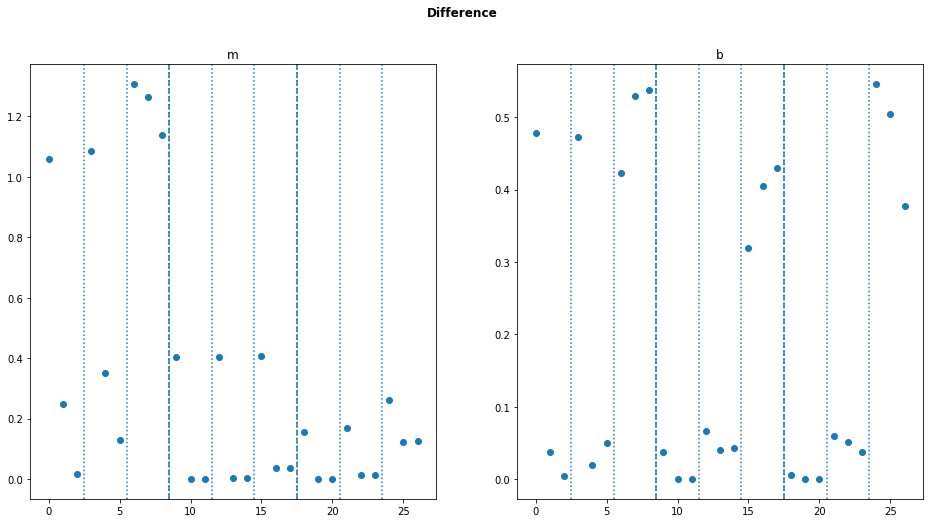

In [8]:
fig=plt.figure(figsize=(16, 8))
plt.suptitle('Difference', weight='bold')

m_out=np.loadtxt("out/111-m_diff.csv", usecols=(0), unpack=True )
b_out=np.loadtxt("out/111-b_diff.csv", usecols=(0), unpack=True )
x=np.arange(0,len(m_out))

plt.subplot(121)
plt.title("m")
plt.scatter(x,np.absolute((m-m_out)/m))
for l in np.arange(2.5,len(m_out)-3,3):
    plt.axvline(l,ls=":")
for l in np.arange(8.5,len(m_out)-9,9):
    plt.axvline(l,ls="--")


plt.subplot(122)
plt.title("b")
plt.scatter(x,np.absolute((b-b_out)/b))
for l in np.arange(2.5,len(b_out)-3,3):
    plt.axvline(l,ls=":")
for l in np.arange(8.5,len(b_out)-9,9):
    plt.axvline(l,ls="--")



Here we plotted the module of the difference between the target $m$, $b$ and the weight and bias of the NN after the training. In each dotted box we have the results obtained from different number of epochs at fixed sigma. Each dashed box contains results with fixed number of training data.

Some observations:
1. fixed sigma and number of epochs, increasing the size of training dataset leads to better results
2. Increasing the number of epochs leads to better results but the impact of this parameter lowers by increasing the training dataset size

Let's now see how the models performs. The following script allows to view the error plots for train and test data. Parameters can be changed by changing the indices according to the table:

In [11]:
df = pd.DataFrame({'sigma': sigmas, 'N_train':ntrains, 'N_epochs': epochss})
display(df)

,sigma,N_train,N_epochs
0,0.0,100,10
1,1.0,550,55
2,10.0,1000,100


In [17]:
isigma=0
itrain=2
iepoch=0

2/2 [==============================] - 0s 12ms/step


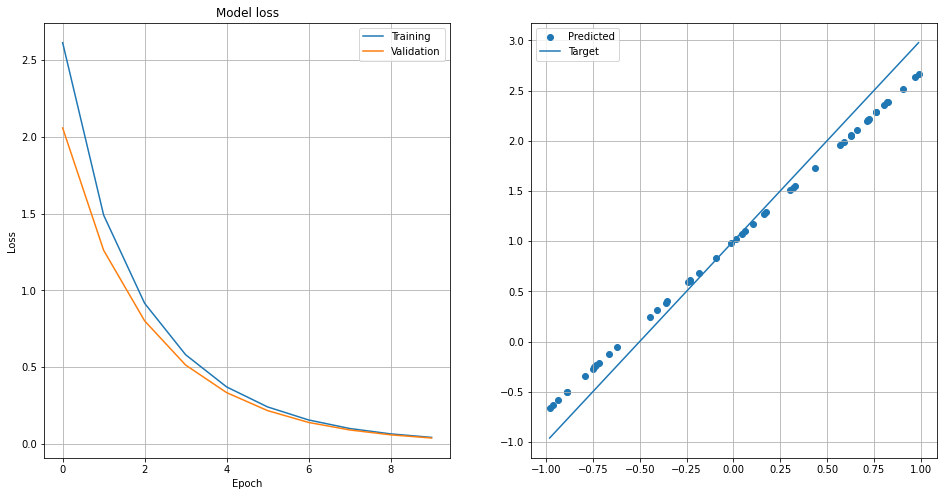

In [18]:
history_df=pd.read_csv("out/111-history-ntrain="+str(ntrains[itrain])+"-sigma="+str(sigmas[isigma])+".csv")
model=load_model("out/111-model-ntrain="+str(ntrains[itrain])+"-sigma="+str(sigmas[isigma])+"-epochs="+str(epochss[iepoch])+".tf")

show_results(model,history_df,50, epochss[iepoch])